In [403]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
model = load_model("tomatomo_model")

In [404]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

In [505]:
newimage =tf.keras.utils.image_dataset_from_directory("tomato_not_use",
                                                   labels = None,
                                                  batch_size=32,
                                                    image_size=(256, 256),
                                                    shuffle=False,)

Found 16424 files belonging to 1 classes.


1/1 [==============================] - 0s 24ms/step
[[7.6480246e-01 5.0807791e-03 1.5694657e-04 3.8219447e-04 2.2781093e-01
  6.7724073e-07 6.0245525e-06 1.7593156e-03 1.4739820e-07 4.4720036e-07]]
1/1 [==============================] - 0s 24ms/step
predicted : Tomato_Bacterial_spot


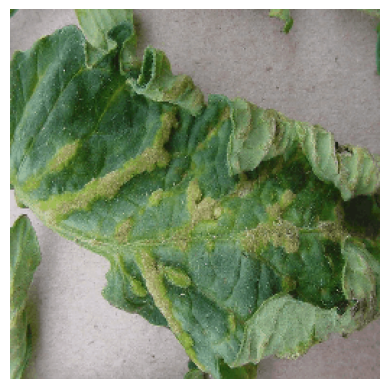

In [550]:
test_img = tf.keras.utils.load_img("tomato_not_use/5369133-ppt_fmt.png",
                                   target_size=(256,256),
                                   grayscale=False
                                  )
plt.imshow(test_img)
plt.axis("off")
input_arr = tf.keras.utils.img_to_array(test_img)
img_array = tf.expand_dims(input_arr,0).numpy()
print(model.predict(img_array))
nameOfClass = check_deceased[np.argmax(model.predict(img_array))]
print("predicted :" ,nameOfClass)

In [137]:
from glob import glob
class_names = glob("tomato_not_use") # Reads all the folders in which images are present
class_names = sorted(class_names) # Sorting them


In [92]:
check_deceased = ['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [508]:
test_image =tf.keras.utils.image_dataset_from_directory("tomato_not_use/test",
                                                   labels = None,
                                                  batch_size=32,
                                                    image_size=(256, 256),
                                                    shuffle=False,)

Found 493 files belonging to 1 classes.


In [525]:
list = [] 
for i in test_image.take(16):
    for j in i:
        input_arr = tf.keras.utils.img_to_array(j)
        img_arr = tf.expand_dims(input_arr,0).numpy()
        list.append(model.predict(img_arr))
print(list)

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step
[array([[1.2014961e-10, 2.9371952e-08, 7.6516726e-06, 1.4927808e-07,
        9.9999225e-01, 2.3849068e-14, 1.0595368e-09, 1.2379586e-13,
        5.7014267e-12, 2.0723930e-12]], dtype=float32), array([[7.1471695e-10, 5.8716219e-06, 5.8121636e-04, 1.9736814e-03,
        9.8185399e-07, 2.5027924e-11, 3.8203125e-09, 9.9743688e-01,
        1.3745172e-06, 1.3813602e-13]], dtype=float32), array([[7.3356694e-01, 2.9142274e-04, 2.0629894e-08, 5.2689447e-11,
        1.7612127e-08, 1.5743242e-11, 3.5884459e-10, 2.6614162e-01,
        2.2197250e-15, 1.3857150e-12]], dtype=float32), array([[1.2529509e-16, 1.0292826e-15, 2.5297865e-15, 1.2355382e-21,
        2.7760920e-18, 1.2769144e-21, 6.8386017e-25, 1.0000000e+00,
        5.8575357e-26, 1.0454142e-25]], dtype=float32), array([[9.9919425e-06, 2.6349922e-09, 1.4323460e-07, 3.0985176e-11,
        1.3918153e-09, 8.8470674e-14, 1.3515148e-13, 9.9998987e-01,
        1.3792690e-15, 1.2948565e-14]], dty

In [557]:
similarities = []
test_data = model.predict(img_array)
test_data = np.array(test_data)
print(test_data)
# Convert the data to numpy arrays for easy computation
for i in range(len(list)):
    data = np.array(list[i])
    # Compute the dot product of the vectors
    dot_product = np.multiply(data, test_data)

    # Compute the norms of the vectors
    norm_data = np.linalg.norm(data)
    norm_test = np.linalg.norm(test_data)

    # Compute the linear cosine similarity
    similarities.append(np.sum(dot_product) / (norm_data * norm_test))

# Find the index of the row with the highest similarity
max_index = np.argmax(similarities)

    # Display the data with the highest similarity
print(f"The most similar row is: {list[max_index]} with a similarity of {similarities[max_index]}")



data = np.subtract(test_data[0],list[max_index][0])
np.delete(data, np.argmax(test_data))
sorted_data = sorted(enumerate(data), key=lambda x: abs(x[1]))
print("+++++++",sorted_data)
nearest_indices = [index for index, _ in sorted_data[:3]]
nearest_numbers = [num for _, num in sorted_data[:3]]

print(f"The top 3 numbers nearest to 0 are {nearest_numbers} at indices {nearest_indices}.")

for i in nearest_indices :
    print(check_deceased[i])

1/1 [==============================] - 0s 27ms/step
[[7.6480246e-01 5.0807791e-03 1.5694657e-04 3.8219447e-04 2.2781093e-01
  6.7724073e-07 6.0245525e-06 1.7593156e-03 1.4739820e-07 4.4720036e-07]]
The most similar row is: [[9.9110961e-01 8.8812495e-03 1.8541700e-08 5.3257310e-08 4.0402551e-06
  1.3510403e-11 5.0503477e-06 1.5159383e-08 2.0802092e-21 3.2797864e-08]] with a similarity of 0.9583843350410461
+++++++ [(8, 1.473982e-07), (9, 4.144025e-07), (5, 6.772272e-07), (6, 9.742048e-07), (2, 0.00015692803), (3, 0.0003821412), (7, 0.0017593005), (1, -0.0038004704), (0, -0.22630715), (4, 0.2278069)]
The top 3 numbers nearest to 0 are [1.473982e-07, 4.144025e-07, 6.772272e-07] at indices [8, 9, 5].
Tomato__Tomato_mosaic_virus
Tomato_healthy
Tomato_Spider_mites_Two_spotted_spider_mite


1/1 [==============================] - 0s 25ms/step
----- Chance of infection -----
1 Tomato_Bacterial_spot
2 Tomato__Tomato_mosaic_virus
3 Tomato_healthy
4 Tomato_Spider_mites_Two_spotted_spider_mite


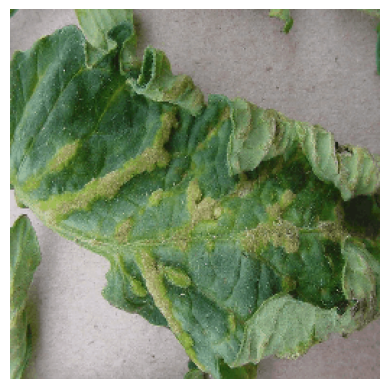

In [555]:
plt.imshow(test_img)
plt.axis("off")
nameOfClass = check_deceased[np.argmax(model.predict(img_array))]
print("----- Chance of infection -----")
print("1",nameOfClass)
for i in range(len(nearest_indices)) :
    print(i+2,check_deceased[nearest_indices[i]])
    